In [1]:
import numpy as np
import pandas as pd

<AxesSubplot:xlabel='Age', ylabel='Salary'>

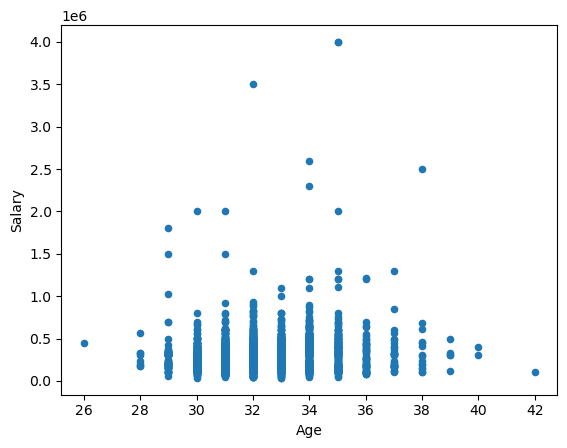

In [7]:
# Questions:
# 1. What inferences may be drawn regarding the interaction between the salary of engineering graduates and their age as of now?
df = pd.read_csv("Engineering_graduate_salary.csv")

df["DOB"] = pd.to_datetime(df["DOB"])
df["Age"] = df["DOB"].apply(lambda x: int((pd.to_datetime("today") - x).days/365))

df.plot.scatter(x="Age", y="Salary")

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

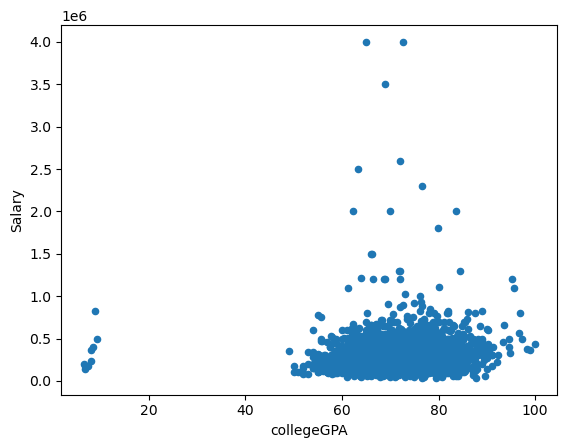

In [25]:
# 2. Check for any relation between GPA and salary, note down observations (if any).

df.plot.scatter(x="collegeGPA", y="Salary")

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

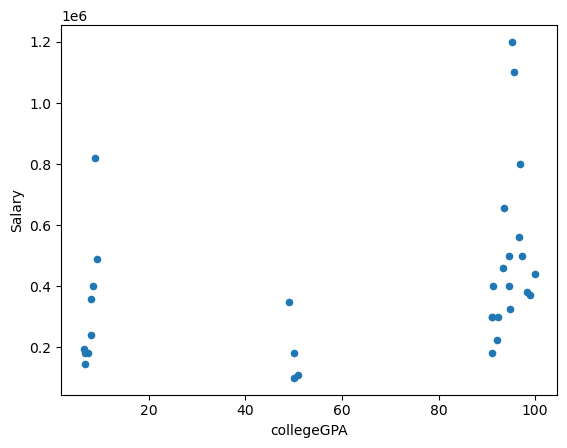

In [12]:
# 3. Identify whether outliers are present in GPA and treat them using appropriate means (if present).

Q1, Q3 = df["collegeGPA"].quantile(.25), df["collegeGPA"].quantile(.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

outliers = df[(df["collegeGPA"] > upper) | (df["collegeGPA"] < lower)]
outliers.plot.scatter(x="collegeGPA", y="Salary")

<AxesSubplot:ylabel='Frequency'>

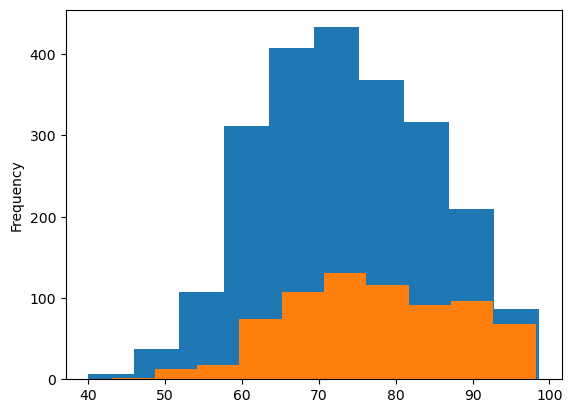

In [27]:
# 4. What is your take on gender versus the percentage scored in higher secondary examinations? Analyze the gender ratio when the scores are higher than 85%.
df_male_12th = df[df["Gender"] == "m"]["12percentage"]
df_female_12th = df[df["Gender"] == "f"]["12percentage"]

df_male_12th.plot.hist()
df_female_12th.plot.hist()

<AxesSubplot:xlabel='CollegeTier'>

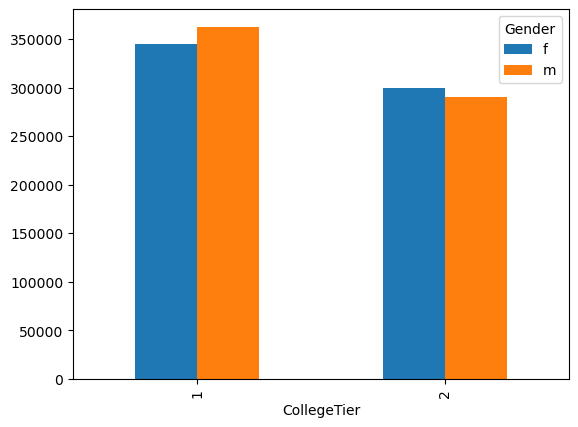

In [18]:
# 5. Explore whether any relation exists between the tier of the college and the salary earned by the graduates with respect to their identified gender.
df.pivot_table(index="CollegeTier", columns="Gender", values="Salary", aggfunc=np.median).plot.bar()